# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) 

matplotlib: 3.8.0


In [3]:
import seaborn
print('seaborn: {}'.format(seaborn.__version__)) 

seaborn: 0.13.2


### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here

df.shape

(1898, 9)

#### Observations:
There are 1898 rows, 9 columns are present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. datatypes of order_id, customer_id, food_preparation_time, delivery_time are integer.
2. datatypes of restaurant_name, cuisine_type, day_of_the_week, rating are object.
3. datetype of cost_of_the_order is float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#From df.info() we can see that there are not really any missing values in the data.
#Yet from df.head() we can see that rating columnb has 'Not given' value.
#Run df.rating.unique to see, how many different values this column has.
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [9]:
#count how many 'Not given'values are
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [10]:
#select the rows that have 'Not given' values and observe whether they have some common traits
df.loc[df.rating=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:
1. Among the 1898 rows, rating column has 736 'Not given' value(39%). 
2. The rows that has 'Not given' rating value, don't share any common traits.
3. It's better to leave those 'Not given' rating values as they are. 

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

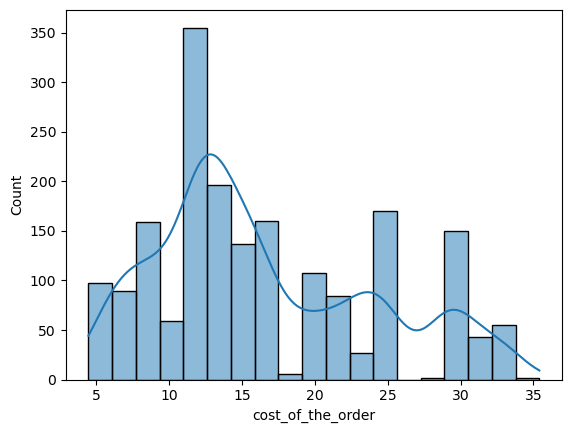

In [12]:
# Write the code here
sns.histplot(data=df, x='cost_of_the_order',kde=True);
#The distribution of the cost of the order is not a normal distribution. 

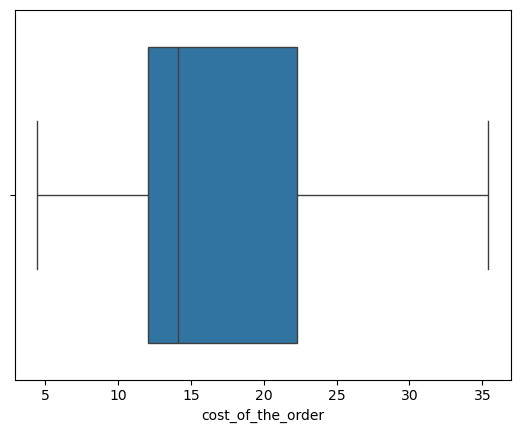

In [13]:
sns.boxplot(data=df, x='cost_of_the_order');
#There is no outliers as to the cost of the order.
#50% of the orders cost less than 15 dollars. 75% of the orders cost less than 25 dollars.
#The minimum cost of an order is around 5 dollars.
#The maximum cost of an order is around 35 dollars.

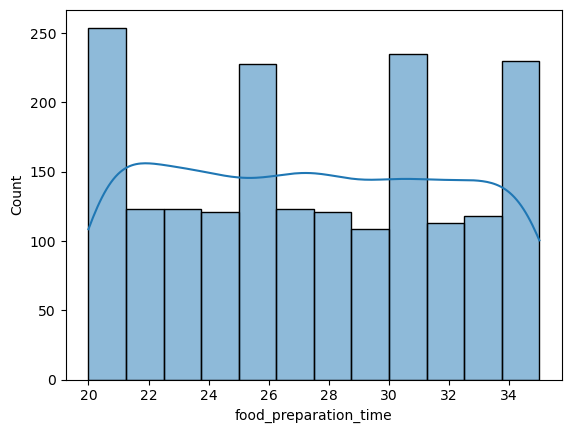

In [14]:
sns.histplot(data=df, x='food_preparation_time', kde=True);
#The food preparation time is not a normal distribution.

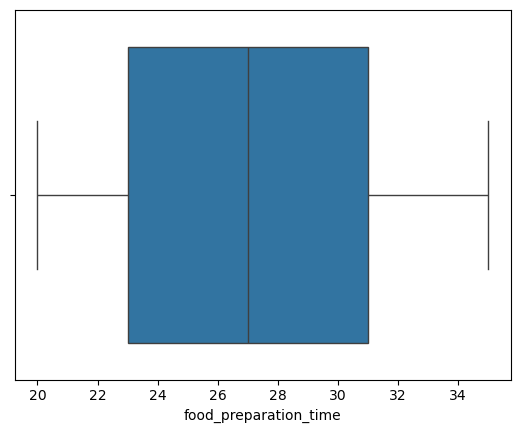

In [15]:
sns.boxplot(data=df, x='food_preparation_time');
#50% of the orders take around 27 minutes for preparation.
#The shortest preparation time is 20 minutes, and the longest preparation time is beyond 34 minutes.
#There is no outliers as to food preparation time.

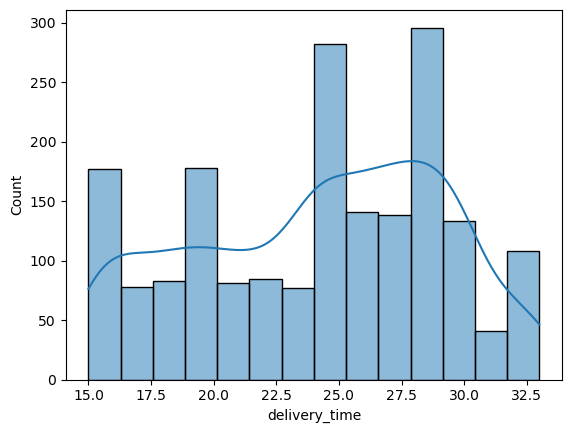

In [16]:
sns.histplot(data=df, x='delivery_time',kde=True);
#The distribution of delivery time is not a normal distribution.

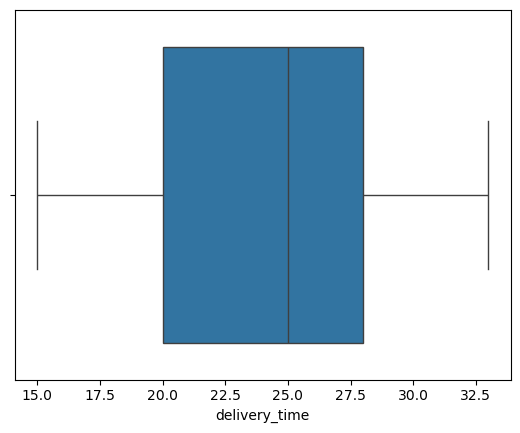

In [17]:
sns.boxplot(data=df, x='delivery_time');
##50% of the orders can be delivered in 25 minutes. 75% of the orders can be delivered in in 30 minutes.
#The shortest delivery time is around 15 minutes. The longest delivery time is around 32.5 minutes.
#There is no outliers as to delivery time.

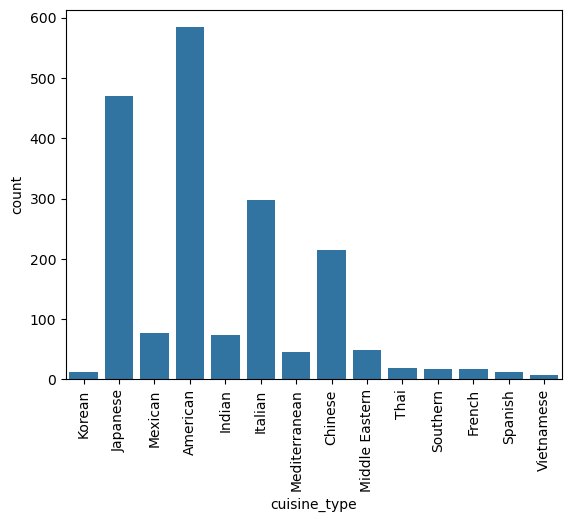

In [18]:
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90);
#The top 4 popular cuisine types are American, japanese, Italian and Chinese food.

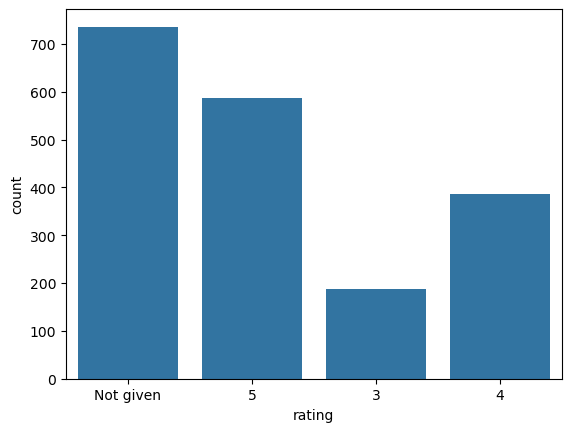

In [19]:
sns.countplot(data=df, x='rating',width=0.8);

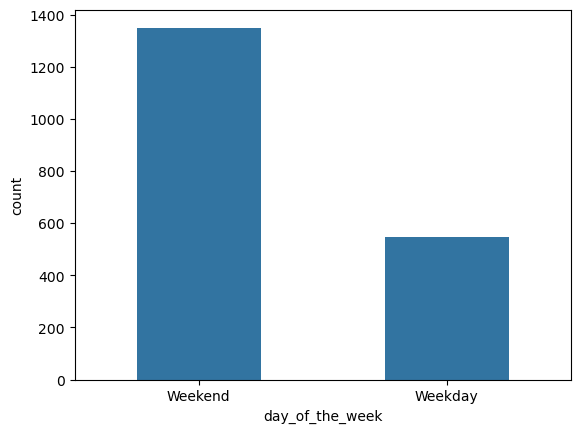

In [20]:
sns.countplot(data=df, x='day_of_the_week',width=0.5);
#The orders from weekend are much more than the orders from weekday. Weekend has around 1300 orders. Weekday has around 500 orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Write the code here
df.groupby(['restaurant_name']).size().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Length: 178, dtype: int64

#### Observations:
Top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop,Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Write the code here
#Size includes NaN values, count does not.Size return a series. 
df.loc[df['day_of_the_week']=='Weekend'].groupby(['cuisine_type']).size().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
dtype: int64

#### Observations:
American cuisine is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Write the code here
len(df.loc[df.cost_of_the_order > 20].index) / len(df.index)

0.2924130663856691

#### Observations:
29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Write the code here
df.groupby(['customer_id']).size().sort_values(ascending=False)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Length: 1200, dtype: int64

#### Observations:
The IDs of the top 3 most frequent customers are 52832, 47440, 83287, and the numbers of their orders are 13, 10 and 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


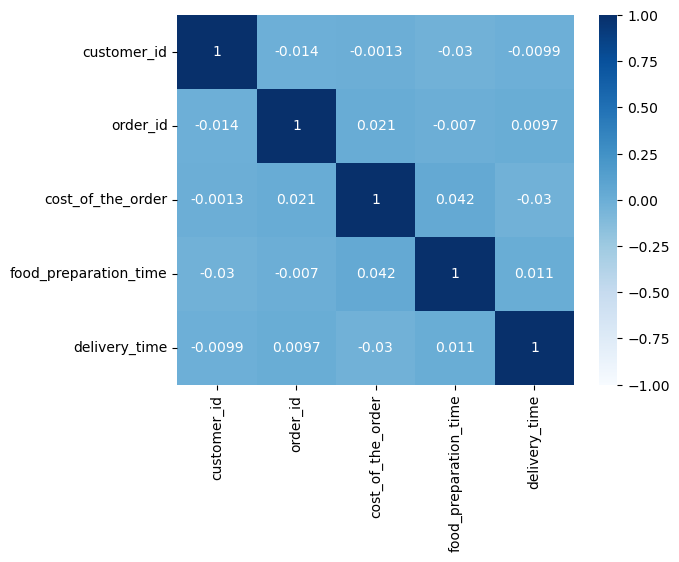

In [26]:
# Write the code here
#explore relations among the numerical variables
sns.heatmap(data=df[['customer_id','order_id','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');
#there is no obvious correlation between these numerical variables.

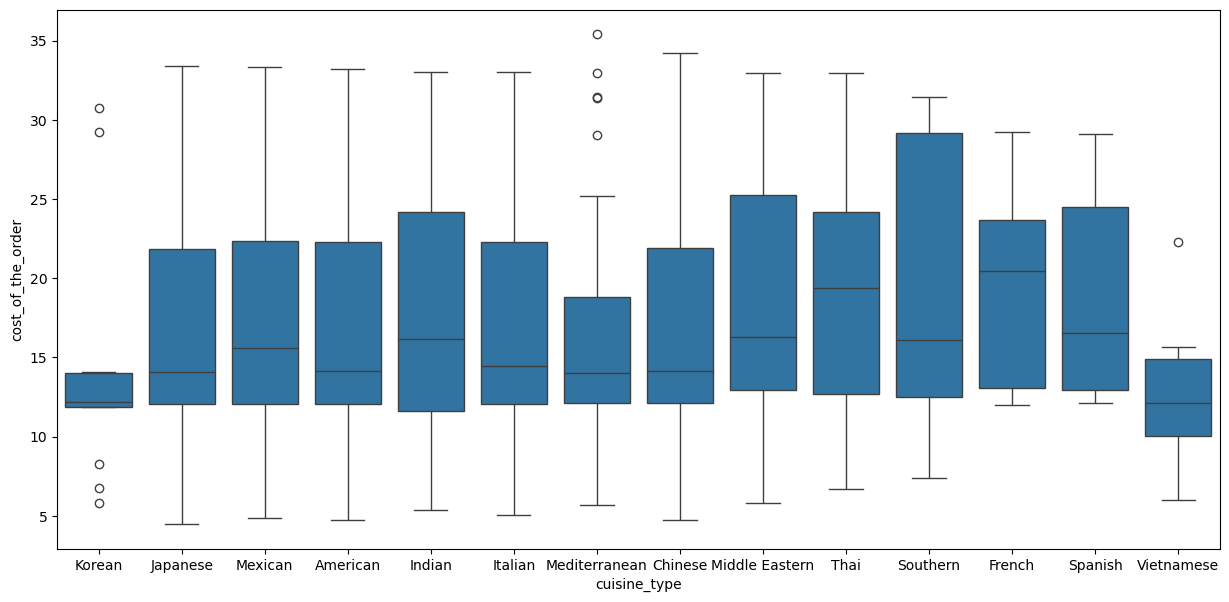

In [27]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order']);
#There are sevral outliners of cost of the order in korean, mediterranean and vietnamese cuisine. 
#Orders of  Korean and Vietnamese cuisine cost the least among all the cuisines.
#All the cost of the orders are below 35 dollars and beyond 5 dollars.

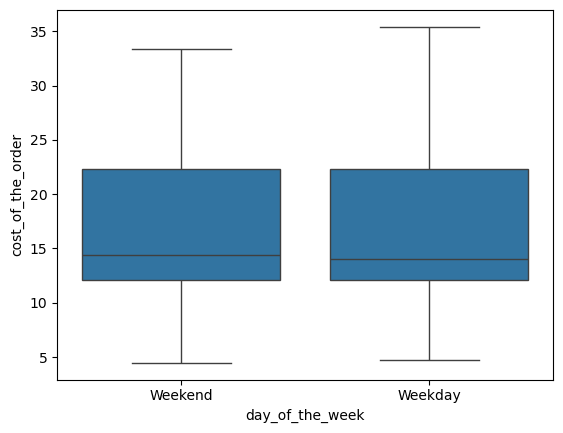

In [28]:
sns.boxplot(x=df['day_of_the_week'],y=df['cost_of_the_order']);

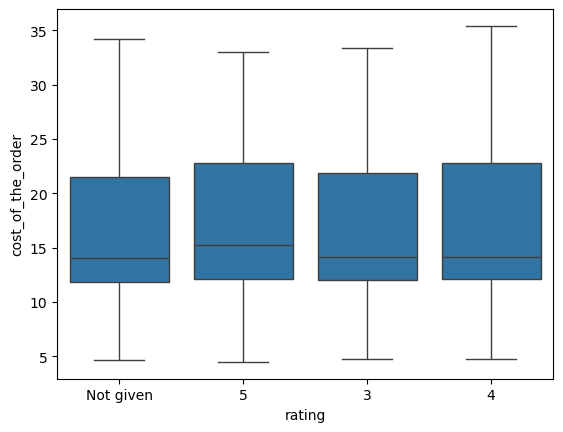

In [29]:
sns.boxplot(x=df['rating'],y=df['cost_of_the_order']);
#rating has little correlation with cost.

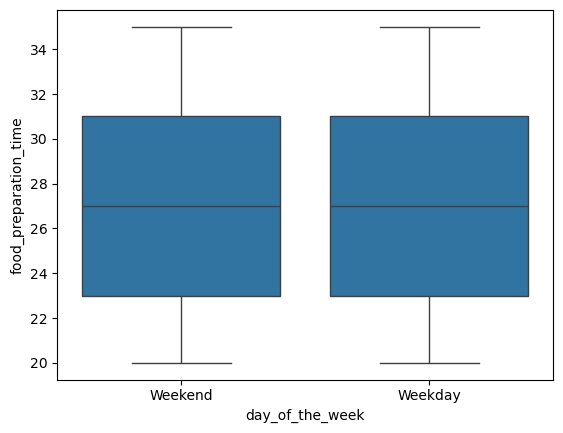

In [30]:
sns.boxplot(x=df['day_of_the_week'],y=df['food_preparation_time']);
#Food preparation time is the same at weekend and weekday.

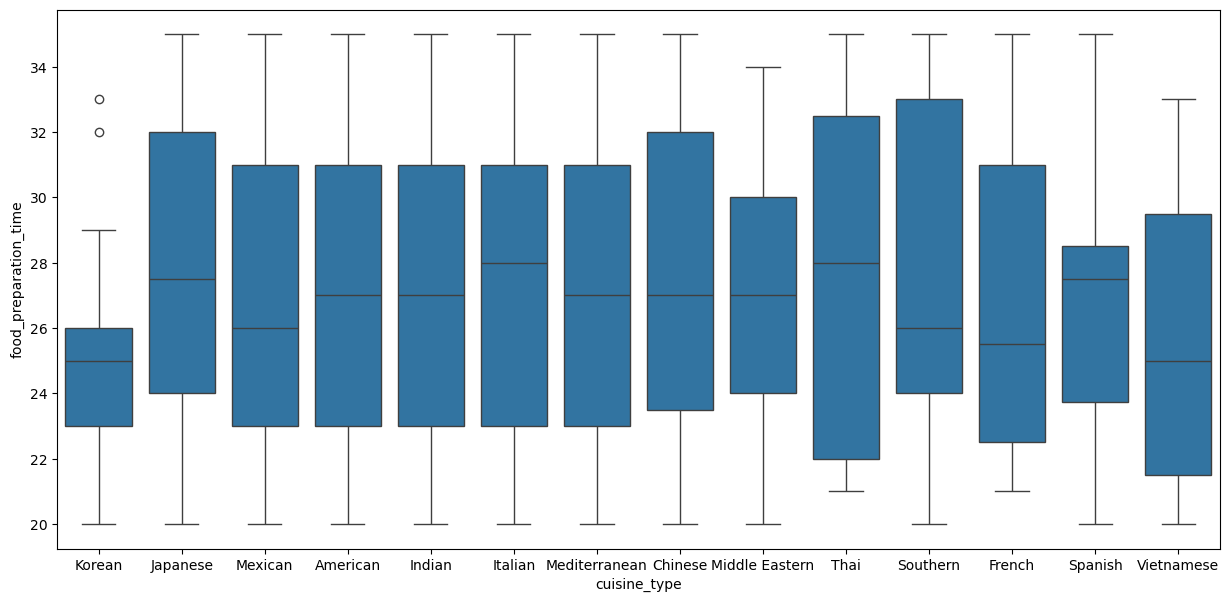

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'],y=df['food_preparation_time']);
#Overall, Korean food takes less time to prepare. 

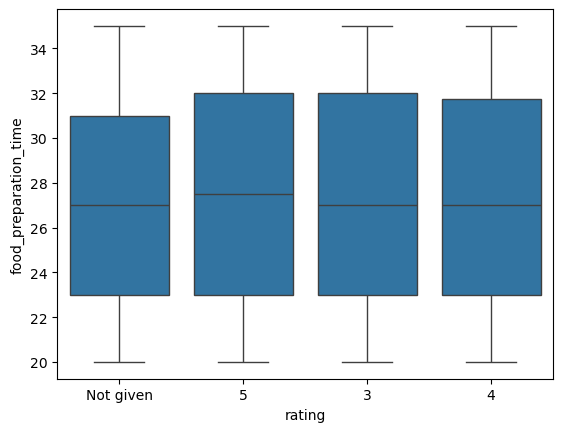

In [32]:
sns.boxplot(x=df['rating'],y=df['food_preparation_time']);

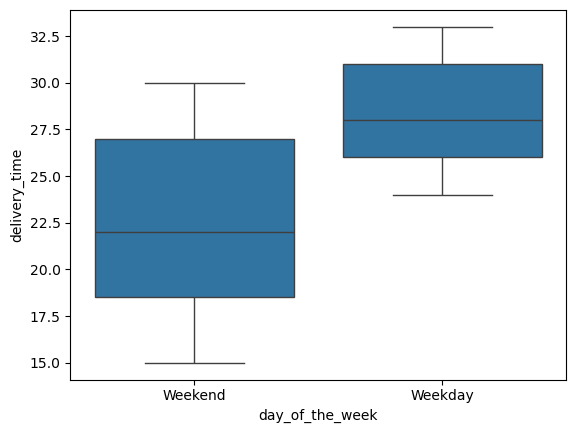

In [33]:
sns.boxplot(x=df['day_of_the_week'], y=df['delivery_time']);
#The median delivery time on weekend is around 22 minutes, and the median delivery time on weekday is around 28 minutes.
#Although weekend has much more orders than weekday, weekend has relatively shorter delivery time.

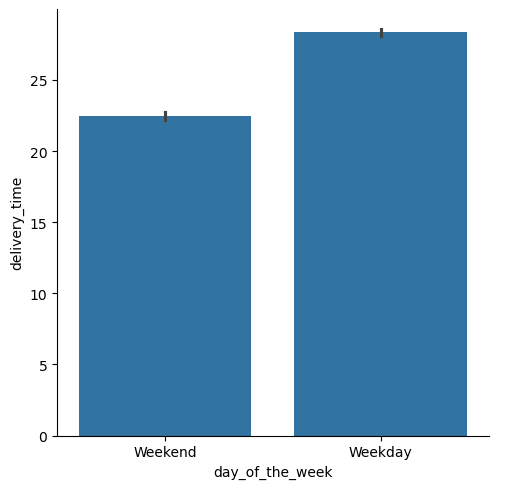

In [34]:
sns.catplot(x=df['day_of_the_week'],y=df['delivery_time'],kind='bar');

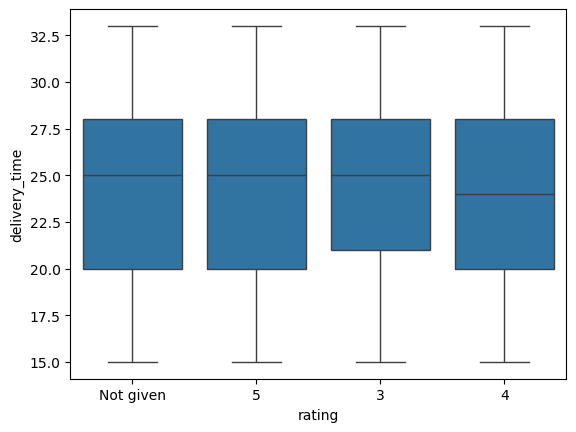

In [35]:
sns.boxplot(x=df['rating'],y=df['delivery_time']);
#rating has little correlation with delivery time.

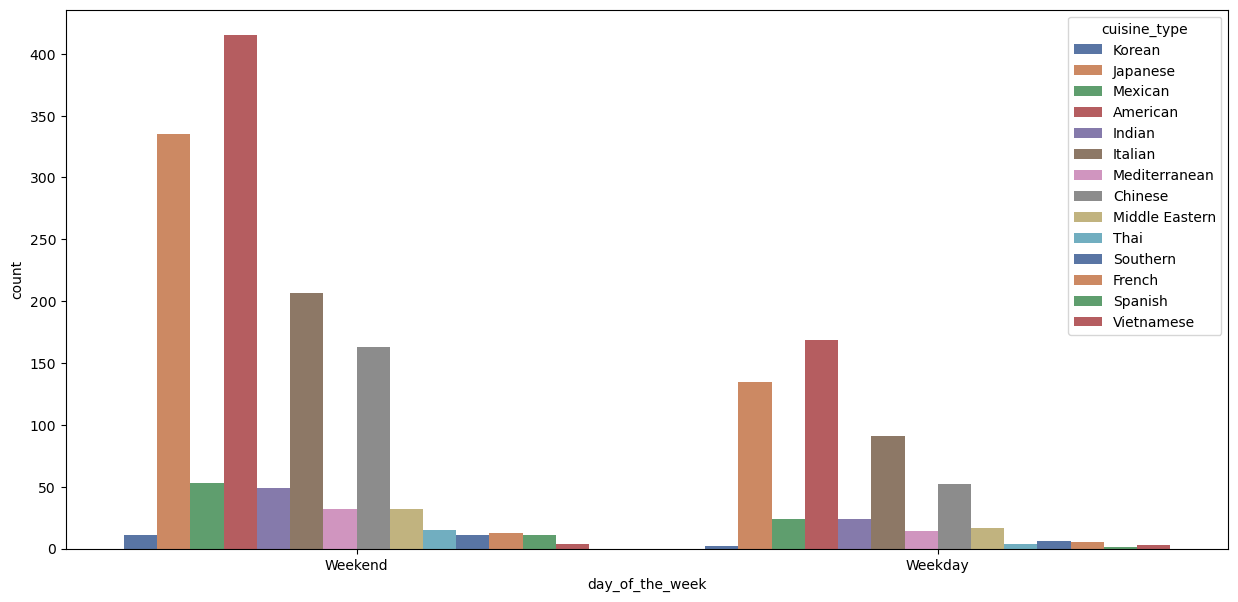

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['day_of_the_week'], hue=df['cuisine_type'],palette='deep');
#Weekend and weekday orders barely have any difference over the cuisine type.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [37]:
# Write the code here

#select the rows that has ratings except for 'Not given', and change the type of rating from object to int.
df_w_rating = df[df.rating != 'Not given']
df_w_rating.loc[:,'rating'] = df_w_rating.rating.astype(int)

#get the restaurant that have more than 50 ratings, and the average ratings are higher than 4.
df_count = df_w_rating.groupby(['restaurant_name']).rating.size().reset_index(name='counts')
df_avg = df_w_rating.groupby(['restaurant_name']).rating.mean().reset_index(name='average')

df1 = df_count.loc[df_count.counts > 50]
df2 = df_avg.loc[df_avg.average > 4]


#find the restaurant that meet both of the criteria.
pd.merge(df1, df2, how='inner', on=['restaurant_name'])


,restaurant_name,counts,average
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations:
The restaurant thats that can get a promotional offer in the advertisement are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [38]:
# Write the code here

#get the revenue of the orders that are greater than 20 dollars.
sum1 = df.loc[df.cost_of_the_order > 20].cost_of_the_order.sum() * 0.25

#get the revenue of the orders that are greater than 5 dollars yet less than 20 dollars.
sum2 = df.loc[(df.cost_of_the_order > 5) & (df.cost_of_the_order <= 20)].cost_of_the_order.sum() * 0.15 

total_revenue = sum1 + sum2
total_revenue

6166.303

#### Observations:
The net revenue generated by the company across all orders is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [39]:
# Write the code here
#calculate the total time required to deliver the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
len(df.loc[df.total_time > 60]) / len(df)

0.1053740779768177

#### Observations:
10.54% of the orders take more than 60 minutes to get dlivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:
# Write the code here
weekday_d_time = round(df[df.day_of_the_week == 'Weekday'].delivery_time.mean(),2)
weekend_d_time = round(df[df.day_of_the_week == 'Weekend'].delivery_time.mean(),2)

print('weekday mean delivery time is ', weekday_d_time, 'minutes.', 'weekend mean delivery time is ', weekend_d_time, 'minutes.')

weekday mean delivery time is  28.34 minutes. weekend mean delivery time is  22.47 minutes.


#### Observations:
weekday mean delivery time is  28.34 . weekend mean delivery time is  22.47. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* 50% of the orders cost less than 15 dollars. 75% of the orders cost less than 25 dollars.The minimum cost of an order is around 5 dollars.The maximum cost of an order is around 35 dollars. 29.2% of the orders cost more than 20 dollars.
* 50% of the orders take around 27 minutes for preparation. The shortest preparation time is 20 minutes, and the longest preparation time is beyond 34 minutes.
* 50% of the orders can be delivered in 25 minutes. 75% of the orders can be delivered in in 30 minutes. The shortest delivery time is around 15 minutes. The longest delivery time is around 32.5 minutes.The average order delivery time is 24.16 minutes.
* The top 4 popular cuisine types are American, japanese, Italian and Chinese food.
* The number of orders from weekend is around 1500, the number of orders from weekday is around 500. Weekend has much more orders than weekday.
* Rating has little correlation with the cost, nor with the delievery time.
* Food preparation time is the same at weekday and weekend. Yet delivery time on weekday is longer than weekend, although weekday has less orders. Weekday average delivery time is 28.34 minutes, while weekend average delivery time is 22.47 minutes.
* Top 5 restaurants in terms of the number of orders are food chain stores.


### Recommendations:

*  Foodhub can consider sending more delivery labors to deliver the orders on weekday, to shorten the average delivery time.
*  Foodhub can consider sending out discounts on weekdays to promote the business, since weekday has much less orders than weekend.
*  Foodhub can consider cooperating with more food chain stores that serve American, japanese, italian and chinese food,since the top restaurants in terms of the number of orders are food chain stores, and the top 4 popular cuisine types are American, japanese, italian and chinese.
*  Foodhub's rating system can be upgraded, since now 39% of the orders are in lack of ratings. 

---